# Bank Marketing:
## Import all the necessary packages to perform Data Analysis

In [123]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import stats libraries
import scipy.stats as stats

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#import scaler and one hot encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from scipy.sparse import vstack

#import model building libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm

from sklearn.model_selection import GridSearchCV
#import model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import auc, roc_auc_score,confusion_matrix

### Data Preprocessing
#### Actions items: 
1. Import the dataset 
2. Analyse Structure of Dataset
3. NA value analysis and Imputation
4. Analyse Column Datatypes And Convert where necessary to the appropriate datatype.
5. Check if duplicates exist

In [124]:
#Import the dataset
raw_data=pd.read_csv("./bank-additional-full.csv", sep=";")
#Check if import properly done by viewing first 3 rows and last 3 rows
print("*"*75)
print("\t\tFirst Three Rows of Dataset")
print("*"*75)
raw_data.head(3)

***************************************************************************
		First Three Rows of Dataset
***************************************************************************


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
print("*"*75)
print("\t\tLast Three Rows of Dataset")
print("*"*75)
raw_data.tail(3)

***************************************************************************
		Last Three Rows of Dataset
***************************************************************************


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [126]:
print("*"*75)
print("Structure of the Dataset")
print("*"*75)
print(raw_data.dtypes)

***************************************************************************
Structure of the Dataset
***************************************************************************
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [127]:
print("*"*75)
print("Investigating datatypes for the columns which \
      look like flag type columns : To ensure if they are really boolean fields.")
print("*"*75)
print("Marital:")
print(raw_data.marital.value_counts())
print("*"*75)
print("Education:")
print(raw_data.education.value_counts())
print("*"*75)
print("Default:")
print(raw_data.default.value_counts())
print("*"*75)
print("Housing:")
print(raw_data.housing.value_counts())
print("*"*75)
print("Loan:")
print(raw_data.loan.value_counts())
print("*"*75)
print("Y:")
print(raw_data.y.value_counts())

***************************************************************************
Investigating datatypes for the columns which       look like flag type columns : To ensure if they are really boolean fields.
***************************************************************************
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
***************************************************************************
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
***************************************************************************
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
***************************************************************************
Housing:
yes        215

##### Observations:
Only the Y column is a flag type column.

All the other columns have more than 2 categories.

Here Y is the target variable indicating if the client has subscribed a term deposit.

In [128]:
print("*"*75)
print("NA Value Analysis")
print("*"*75)
print("Column Name \t NA count")
print("*"*75)
print(raw_data.isna().sum())

***************************************************************************
NA Value Analysis
***************************************************************************
Column Name 	 NA count
***************************************************************************
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Observations:
We do not have any NA values in our dataset

#### Datatype convertion:
Since all the datatypes are as per expectation we will not be converting them. 

In [129]:
print("*"*75)
print("Check for Duplicate data rows")
print("*"*75)
print(raw_data.duplicated().sum())

***************************************************************************
Check for Duplicate data rows
***************************************************************************
12


#### Observations:

We have 12 duplicate rows. We need clean the duplicate rows and keep one row per duplicate set.

In [130]:
raw_data.drop_duplicates(keep="first",inplace=True)
print("Check for Duplicate data rows after dropping duplicates.")
print(raw_data.duplicated().sum())

Check for Duplicate data rows after dropping duplicates.
0


### Exploratory Data Analysis
#### Action Items:

1. Create Supporting Functions for the EDA
2. Univariate Analysis of all the numeric Columns
3. Univariate Analysis of all the Categorical Columns
4. Bivariate Analysis of all the Numeric Columns (w.r.t Target Column)
5. Bivariate Analysis of all the Categorical Columns (w.r.t Target Column)
6. Outlier Analysis

In [131]:
#Supporting functions for EDA:
# 1. Get Numeric and Categorical Column list
def get_num_cat_cols(df):
    '''get_num_cat_cols(df:dataframe):return num_cols, cat_cols'''
    cat_cols=[]
    num_cols=[]
    for i in df.columns:
        if df[i].dtype=="object":
            cat_cols.append(i)
        else:
            num_cols.append(i)
    return num_cols,cat_cols

In [132]:
#Univariate Analysis of Numeric Columns:
num_cols,cat_cols=get_num_cat_cols(raw_data)
print("Numeric Columns List: ",num_cols)
print("Categorical Columns List: ",cat_cols)

Numeric Columns List:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns List:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


#### Univariate Analysis of Numeric Columns:

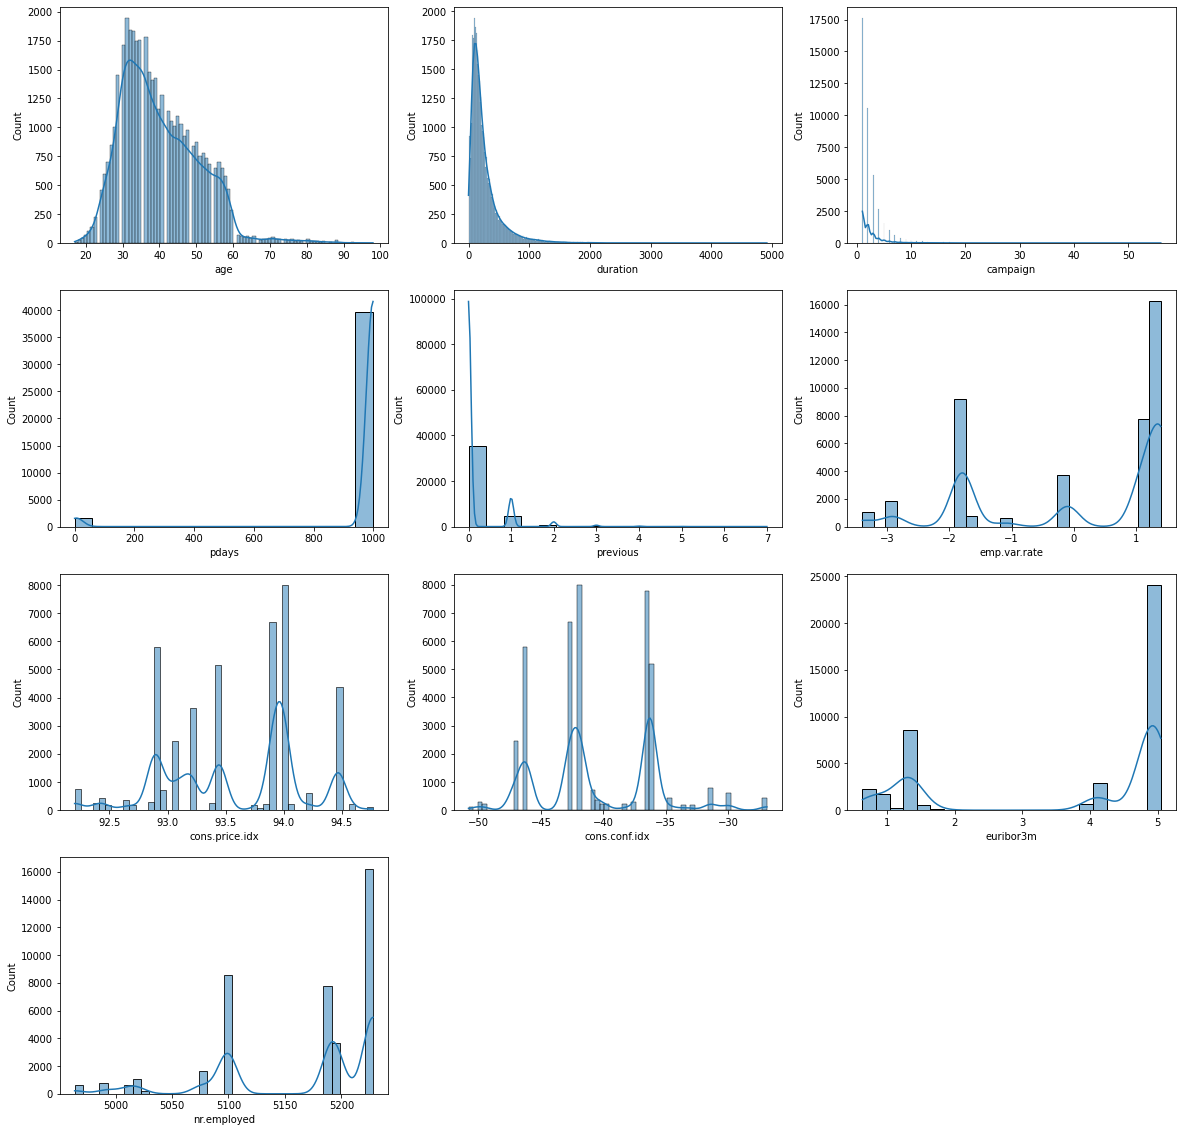

In [133]:
row_cnt=int(len(num_cols)/3)+1
col_cnt=3
ht=row_cnt*5
fig,axs=plt.subplots(row_cnt,col_cnt)
fig.set_figwidth(20)
fig.set_figheight(ht)
row_ind=0
col_ind=0
for i in num_cols:
    sns.histplot(x=raw_data[i],kde=True,ax=axs[row_ind,col_ind])
    col_ind=col_ind+1
    if col_ind==3:
        col_ind=0
        row_ind=row_ind+1
for i in range(col_ind,3):
    axs[row_ind,i].set_axis_off()
plt.show()

#### Observations:

1. Age : Age of the client
    
    i.    The data is right skewed.

    ii.   Most of the clients lie in the range 0 to 60 age group.
    
    iii.  The max number of clients are from the age group 30 to 40.


2. Duration : Duration of the last call made
    
    i.    The data is right skewed
    
    ii.   Most of the clients calls last for a duration of less than 1000 seconds.


3. Campaign : Number of contacts performed during this campaign and for this client
    
    i.    The data is right skewed
    
    ii.   The max number of contact performed for the client for that campaign lie from 0 to 5.


4. Pdays : Number of days that passed by after the client was last contacted from a previous campaign 
            (999 client was not previously contacted)
    
    i.    Distribution is very skewed.
    
    ii.   Majority of clients were not contacted.
    
    iii.  The clients that were contacted previously in last 100 days is less than 2500.


5. Previous : Number of contacts performed before this campaign and for this client
    
    i.    The distribution of the data is right skewed.
    
    ii.   Maximum number of clients were not contacted before the campaign.
    
    iii.  Less than 10000 clients were contacted once before the campaign.
    

6. Emp.var.rate : Employment variation rate - quarterly indicator 
    
    i.    The Maximum observed above 1.
 

7. Cons.price.idx: Consumer price index - monthly indicator
    
    i.    The Maximum is observed around 94.0


8. Cons.conf.idx: Consumer confidence index - monthly indicator
    
    i.    The data is multimodal.
    
    ii.   The maximum is observed around -42 and -32.


9. Euribor3m: Euribor 3 month rate - daily indicator 
    
    i.    The Maximum is observed above 1.


10. Nr.employed: Number of employees - quarterly indicator
    
    i.    The maximum is observed between 5200 and 5250.
    
The bin size for every column could be improved.

#### Univariate Analysis for Categorical Columns

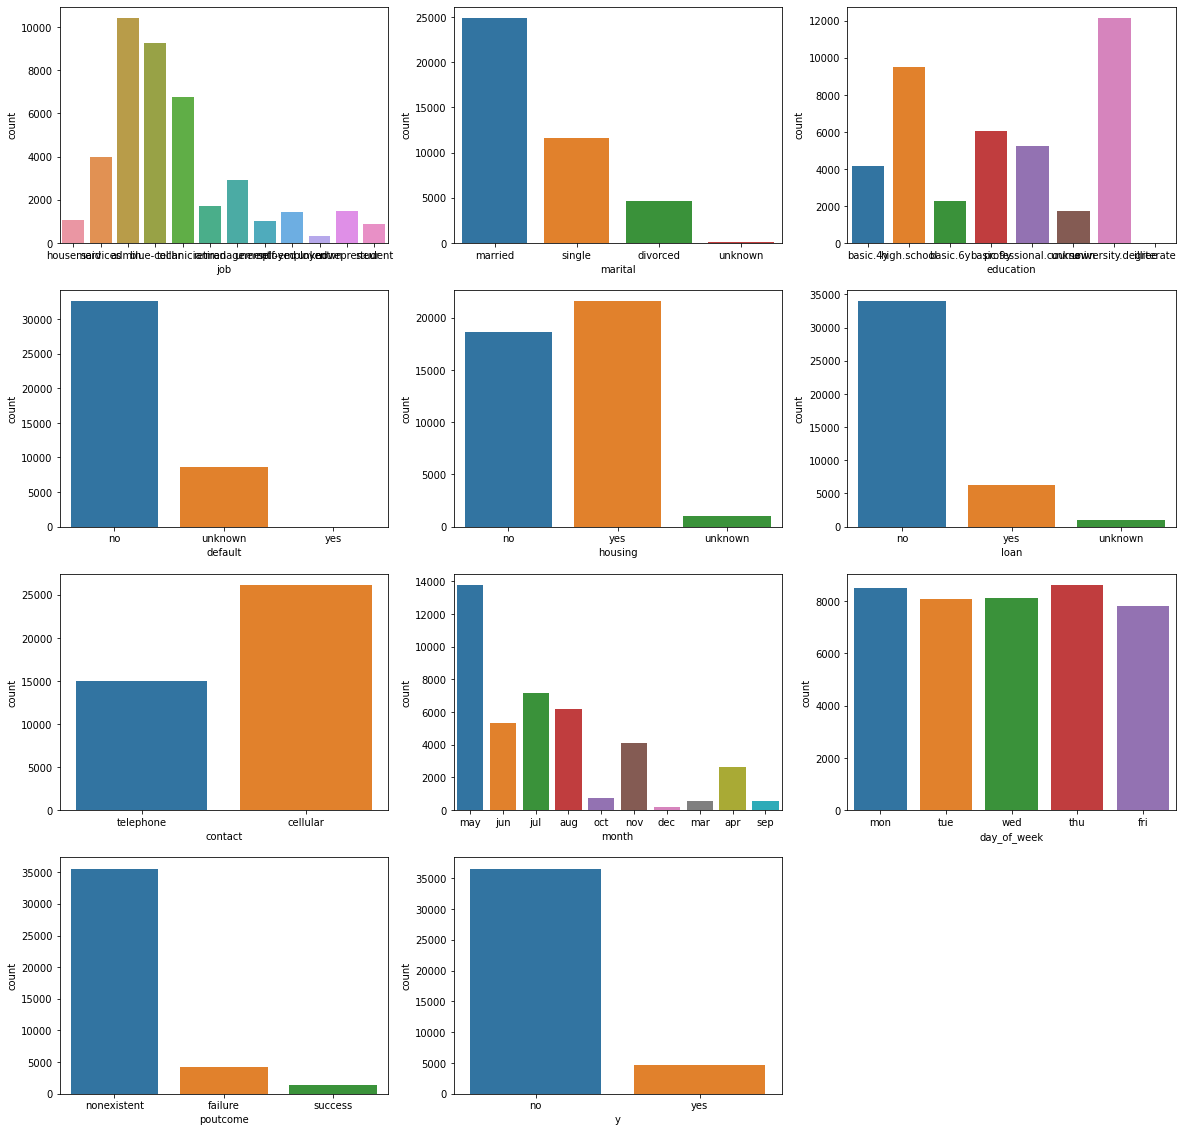

In [134]:
row_cnt=int(len(num_cols)/3)+1
col_cnt=3
ht=row_cnt*5
fig,axs=plt.subplots(row_cnt,col_cnt)
fig.set_figwidth(20)
fig.set_figheight(ht)
row_ind=0
col_ind=0
for i in cat_cols:
    sns.countplot(x=raw_data[i],ax=axs[row_ind,col_ind])
    col_ind=col_ind+1
    if col_ind==3:
        col_ind=0
        row_ind=row_ind+1
for i in range(col_ind,3):
    axs[row_ind,i].set_axis_off()
plt.show()

#### Bivariate Analysis with respect to target column

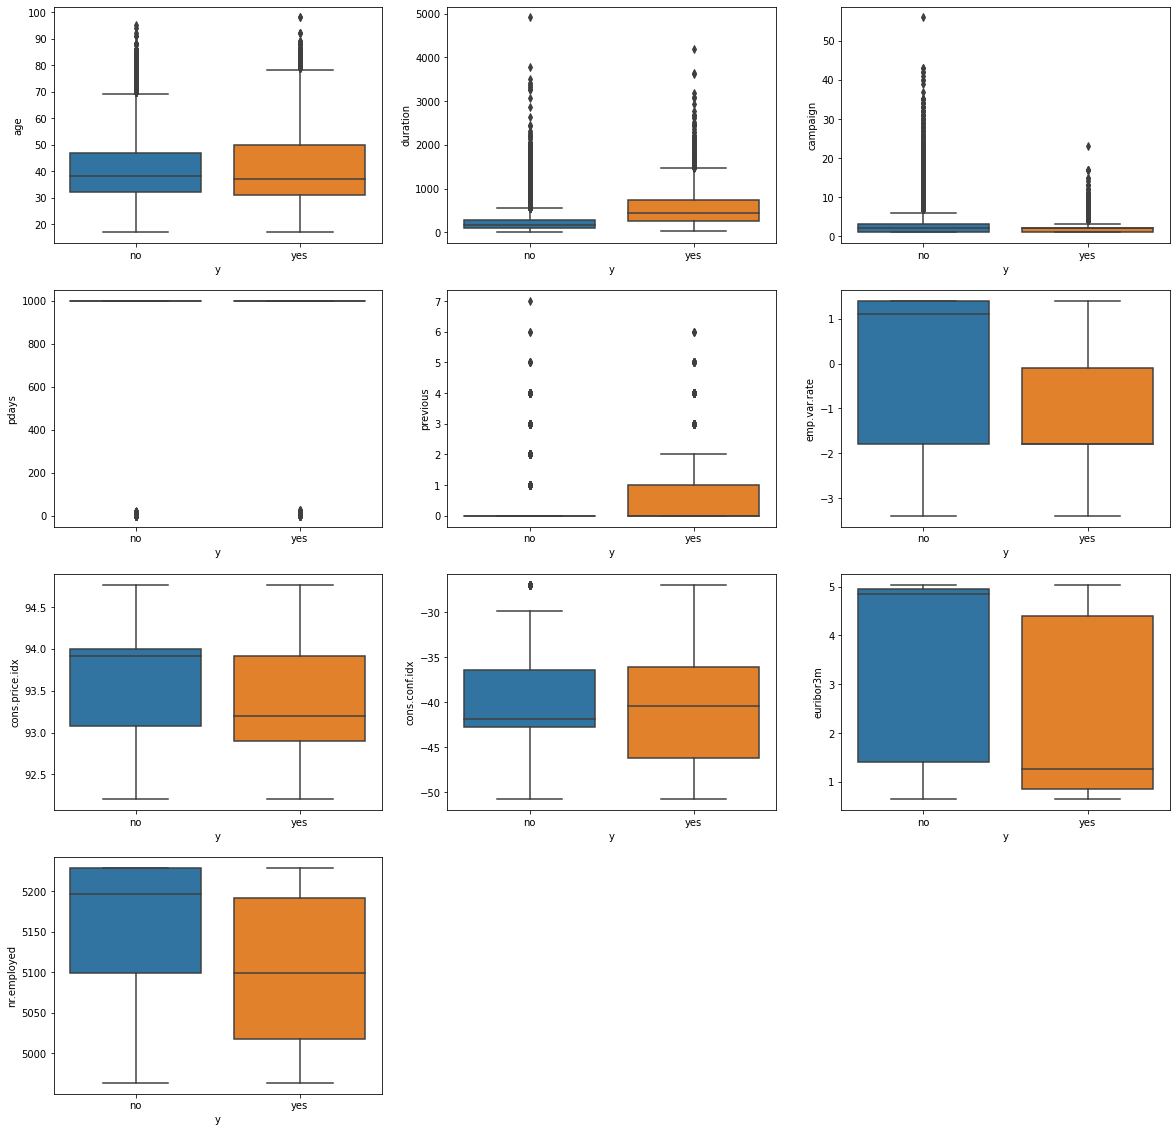

In [135]:
row_cnt=int(len(num_cols)/3)+1
col_cnt=3
ht=row_cnt*5
fig,axs=plt.subplots(row_cnt,col_cnt)
fig.set_figwidth(20)
fig.set_figheight(ht)
row_ind=0
col_ind=0
for i in num_cols:
    sns.boxplot(x=raw_data["y"],y=raw_data[i],ax=axs[row_ind,col_ind])
    col_ind=col_ind+1
    if col_ind==3:
        col_ind=0
        row_ind=row_ind+1
for i in range(col_ind,3):
    axs[row_ind,i].set_axis_off()
plt.show()

Observations:

1. Duration : Column shows some significant impact on the Y values distribution.

2. Previous : Column also shows significant impact on the Y values distribution.

3. Emp.var.rate,cons.conf.idx, cons.price.idx, euribor3m,  nr.employed : Columns have huge difference in the medians for the Y column values.

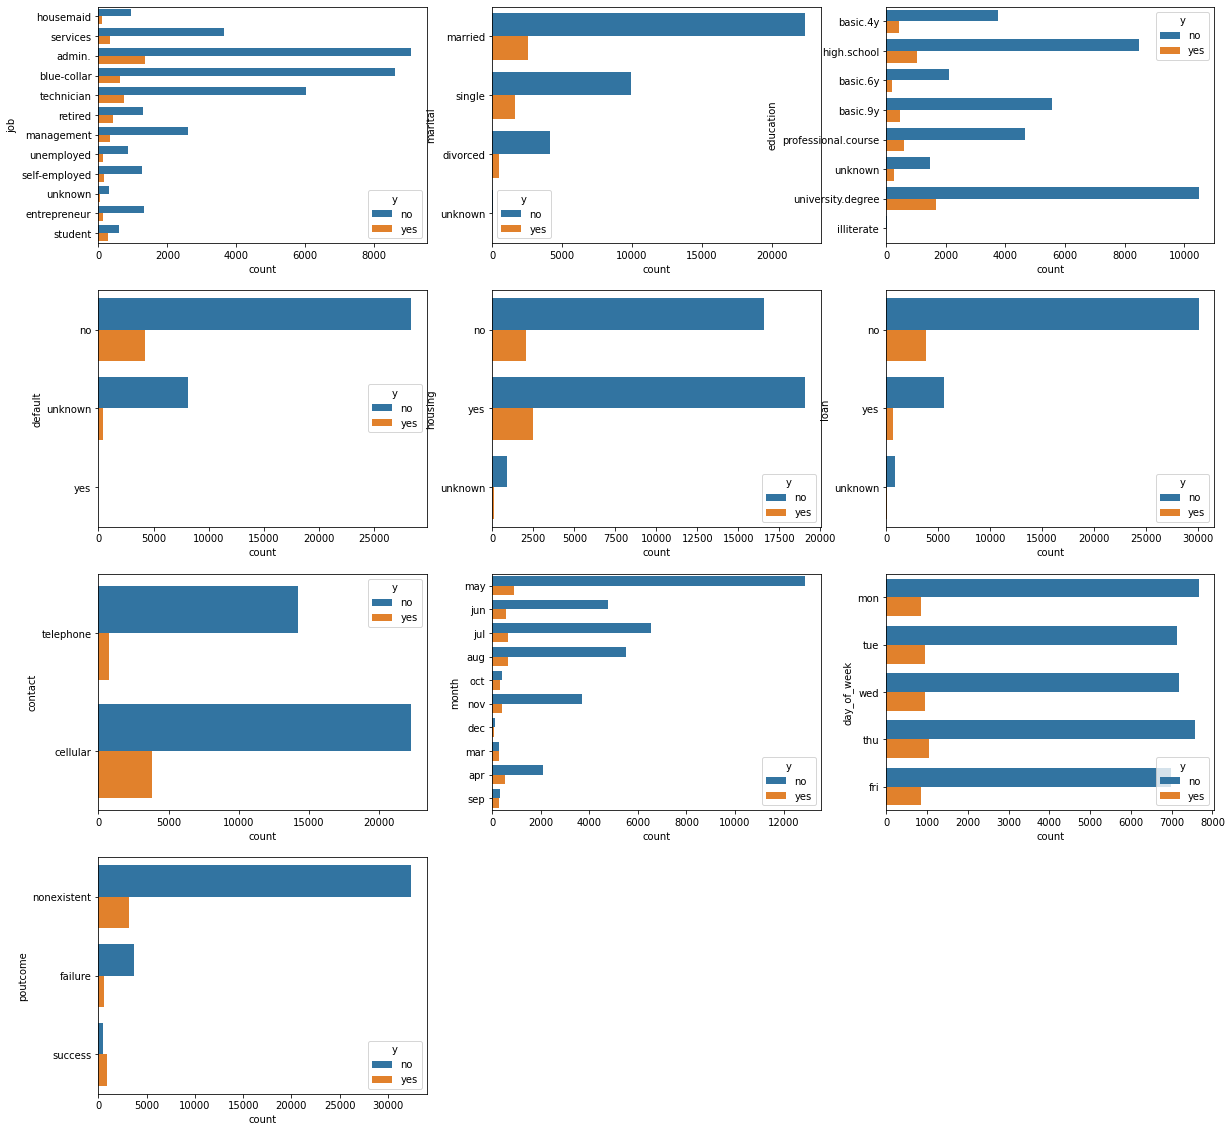

In [136]:
row_cnt=int(len(cat_cols)/3)+1
col_cnt=3
ht=row_cnt*5
fig,axs=plt.subplots(row_cnt,col_cnt)
fig.set_figwidth(20)
fig.set_figheight(ht)
row_ind=0
col_ind=0
for i in cat_cols[:-1]:
    sns.countplot(y=raw_data[i],dodge=True,hue=raw_data['y'],ax=axs[row_ind,col_ind])
    col_ind=col_ind+1
    if col_ind==3:
        col_ind=0
        row_ind=row_ind+1
for i in range(col_ind,3):
    axs[row_ind,i].set_axis_off()
plt.show()

#### Train test split before performing outlier and other analysis

In [137]:
x_train,x_test,y_train,y_test=train_test_split(raw_data.iloc[:,:-1].copy(),raw_data["y"].copy(),stratify=raw_data["y"],
                                              test_size=0.25,random_state=100)

print("*"*75)
print("Train X shape : ",x_train.shape," Y shape : ",y_train.shape)
print("Test X shape : ",x_test.shape," Y shape : ",y_test.shape)

***************************************************************************
Train X shape :  (30882, 20)  Y shape :  (30882,)
Test X shape :  (10294, 20)  Y shape :  (10294,)


#### Outlier Analysis

In [138]:
def get_outliers_bounds(df,cols):
    ub_list,lb_list=[],[]
    for i in cols:
        q1,q3=df[i].quantile([0.25,0.75])
        iqr=q3-q1
        lb=q1-1.5*iqr
        ub=q3+1.5*iqr
        lb_list.append(lb)
        ub_list.append(ub)
    return lb_list,ub_list

In [139]:
def get_outlier_count(df,cols,lb_list,ub_list):
    count=[]
    percent=[]
    for ind,i in enumerate(cols):
        data=df.loc[(lb_list[ind]<df[i])&(ub_list[ind]>df[i]),i]
        cnt=df.shape[0]-data.shape[0]
        count.append(cnt)
        percent.append(cnt*100/df.shape[0])
    return count,percent

In [140]:
lb,ub=get_outliers_bounds(x_train,num_cols)
count_outliers , percent_outliers=get_outlier_count(x_train,num_cols,lb,ub)
outliers=pd.DataFrame({
    "column":num_cols,
    "outliers_count":count_outliers,
    "outliers_percent":percent_outliers
})
print("*"*75)
print("Total number of rows: ",x_train.shape[0])
print("*"*75)
print("outliers")
print(outliers)

***************************************************************************
Total number of rows:  30882
***************************************************************************
outliers
           column  outliers_count  outliers_percent
0             age             333          1.078298
1        duration            2235          7.237226
2        campaign            2556          8.276666
3           pdays           30882        100.000000
4        previous           30882        100.000000
5    emp.var.rate               0          0.000000
6  cons.price.idx               0          0.000000
7   cons.conf.idx             337          1.091251
8       euribor3m               0          0.000000
9     nr.employed               0          0.000000


Observations:

1. The pdatys and previous have skewed distrubutions. We will not remove treat for outliers for these two columns.

2. For Duration, campaign ,  age, and cons.conf.idx columns have less than 9 % outliers. We will treat them with the median valies.

In [141]:
def get_medians(df,cols):
    med=[]
    for i in cols:
        med.append(df[i].median())
    return med

In [142]:
def rm_outliers(df,cols,med,lb_list,ub_list,count_limit,count):
    for ind,i in enumerate(cols):
        if count[ind]<count_limit:
            df.loc[df[i]<lb_list[ind],i]=med[ind]
            df.loc[df[i]>ub_list[ind],i]=med[ind]
    return df

In [143]:
medians_cols=get_medians(x_train,num_cols)
x_train_o=rm_outliers(x_train.copy(),num_cols,medians_cols,lb,ub,9,outliers["outliers_percent"])

In [144]:
print("Check if all values inside lb and ub: ")
print(num_cols[-3]," All false for values<lb : ", not any(x_train_o.loc[x_train_o[num_cols[-3]]<lb[-3],num_cols[-3]]))
print(num_cols[0]," All false for values<lb: ", not any(x_train_o.loc[x_train_o[num_cols[0]]<lb[0],num_cols[0]]))
print(num_cols[1]," All false for values<lb: ", not any(x_train_o.loc[x_train_o[num_cols[1]]<lb[1],num_cols[1]]))
print("*"*75)
print(num_cols[-3]," All false for values>ub : ", not any(x_train_o.loc[x_train_o[num_cols[-3]]>ub[-3],num_cols[-3]]))
print(num_cols[0]," All false for values>ub: ", not any(x_train_o.loc[x_train_o[num_cols[0]]>ub[0],num_cols[0]]))
print(num_cols[1]," All false for values>ub: ", not any(x_train_o.loc[x_train_o[num_cols[1]]>ub[1],num_cols[1]]))

Check if all values inside lb and ub: 
cons.conf.idx  All false for values<lb :  True
age  All false for values<lb:  True
duration  All false for values<lb:  True
***************************************************************************
cons.conf.idx  All false for values>ub :  True
age  All false for values>ub:  True
duration  All false for values>ub:  True


In [145]:
count_outliers_test , percent_outliers_test=get_outlier_count(x_test,num_cols,lb,ub)
outliers_test=pd.DataFrame({
    "column":num_cols,
    "outliers_count":count_outliers_test,
    "outliers_percent":percent_outliers_test
})
print("*"*75)
print("Total number of rows: ",x_test.shape[0])
print("*"*75)
print("outliers")
print(outliers_test)

***************************************************************************
Total number of rows:  10294
***************************************************************************
outliers
           column  outliers_count  outliers_percent
0             age             135          1.311444
1        duration             728          7.072081
2        campaign             829          8.053235
3           pdays           10294        100.000000
4        previous           10294        100.000000
5    emp.var.rate               0          0.000000
6  cons.price.idx               0          0.000000
7   cons.conf.idx             109          1.058869
8       euribor3m               0          0.000000
9     nr.employed               0          0.000000


In [146]:
x_test_o=rm_outliers(x_test.copy(),num_cols,medians_cols,lb,ub,9,outliers_test["outliers_percent"])

#### MinMaxScaling and OneHotEncoding

In [147]:
def get_scalers(df,cols):
    scalers=[]
    for i in cols:
        scaler=MinMaxScaler()
        scaler.fit(np.asarray(df[i]).reshape(-1,1))
        scalers.append(scaler)
    return scalers

In [148]:
def get_scaled_data(df,cols,scaler_list):
    for ind,i in enumerate(cols):
        col=scaler_list[ind].transform(np.asarray(df[i]).reshape(-1,1))
        if ind==0:
            num_data=col
        else:
            num_data=np.column_stack((num_data,col))
    return num_data

In [149]:
scalers=get_scalers(x_train_o,num_cols)
train_scaled=get_scaled_data(x_train_o.copy(),num_cols,scalers)
test_scaled=get_scaled_data(x_test_o.copy(),num_cols,scalers)

In [150]:
train_scaled[0:4,:]

array([[0.26923077, 0.16770186, 0.2       , 1.        , 0.        ,
        0.9375    , 0.69875292, 0.68571429, 0.95760599, 0.85973535],
       [0.59615385, 0.27795031, 0.6       , 1.        , 0.        ,
        1.        , 0.88230709, 0.42857143, 0.95919293, 1.        ],
       [0.67307692, 0.01552795, 0.4       , 1.        , 0.        ,
        1.        , 0.88230709, 0.42857143, 0.98050329, 1.        ],
       [0.36538462, 0.05124224, 0.2       , 1.        , 0.        ,
        0.9375    , 0.69875292, 0.68571429, 0.95737928, 0.85973535]])

In [151]:
test_scaled[0:4,:]

array([[0.67307692, 0.05590062, 0.        , 1.        , 0.        ,
        0.9375    , 0.69875292, 0.68571429, 0.9580594 , 0.85973535],
       [0.26923077, 0.2826087 , 0.        , 1.        , 0.        ,
        0.9375    , 0.69875292, 0.68571429, 0.95737928, 0.85973535],
       [0.75      , 0.36490683, 0.        , 1.        , 0.        ,
        1.        , 0.48441154, 0.7       , 0.98209023, 1.        ],
       [0.34615385, 0.0310559 , 0.2       , 0.00600601, 0.14285714,
        0.6875    , 0.3893219 , 0.41904762, 0.78032192, 0.8778828 ]])

In [152]:
def get_ohe(df,cols):
    ohe_list=[]
    for i in cols:
        ohe=OneHotEncoder(sparse=False)
        ohe.fit(np.asarray(df[i]).reshape(-1,1))
        ohe_list.append(ohe)
    return ohe_list

In [153]:
def get_scaled_data(df,cols,ohe_list):
    for ind,i in enumerate(cols):
        col=ohe_list[ind].transform(np.asarray(df[i]).reshape(-1,1))
        if ind==0:
            cat_data=col
        else:
            cat_data=np.column_stack((cat_data,col))
    return cat_data

In [154]:
ohes=get_ohe(x_train_o,cat_cols[:-1])
train_ohe=get_scaled_data(x_train_o.copy(),cat_cols[:-1],ohes)
test_ohe=get_scaled_data(x_test_o.copy(),cat_cols[:-1],ohes)

In [155]:
train_ohe[0,:]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0.])

In [156]:
test_ohe[0:2,:]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0.]])

In [157]:
train_x=np.column_stack((train_scaled,train_ohe))
test_x=np.column_stack((test_scaled,test_ohe))

In [158]:
train_x[0,:]

array([0.26923077, 0.16770186, 0.2       , 1.        , 0.        ,
       0.9375    , 0.69875292, 0.68571429, 0.95760599, 0.85973535,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        ])

#### Model Building

In [159]:
model=LogisticRegression(max_iter=1000)
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr=[auc_score_tr]
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

pred_scores=pd.DataFrame({})
model_type=["Logistic Regression"]
auc_scores=[auc_score]


In [160]:
model=DecisionTreeClassifier()
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr.append(auc_score_tr)
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

model_type.append("Decision Tree")
auc_scores.append(auc_score)

In [161]:
model=RandomForestClassifier()
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr.append(auc_score_tr)
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

model_type.append("Random Forest")
auc_scores.append(auc_score)

In [162]:
model=AdaBoostClassifier()
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr.append(auc_score_tr)
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

model_type.append("Adaboost")
auc_scores.append(auc_score)

In [163]:
model=GradientBoostingClassifier()
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr.append(auc_score_tr)
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

model_type.append("GadientBoosting")
auc_scores.append(auc_score)

In [164]:
model=lightgbm.LGBMClassifier()
model.fit(train_x,y_train)

y_train_pred=model.predict_proba(train_x)[:,1]
auc_score_tr=roc_auc_score(y_train,y_train_pred)
auc_scores_tr.append(auc_score_tr)
#predictions
y_test_pred=model.predict_proba(test_x)[:,1]

auc_score=roc_auc_score(y_test,y_test_pred)

model_type.append("LightGBM")
auc_scores.append(auc_score)

In [165]:
from prettytable import PrettyTable
tbl=PrettyTable()
tbl.field_names=["Model","AUC SCORE train","AUC SCORE test"]
for i in range(len(model_type)):
    tbl.add_row([model_type[i],auc_scores_tr[i],auc_scores[i]])
print(tbl)

+---------------------+--------------------+--------------------+
|        Model        |  AUC SCORE train   |   AUC SCORE test   |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.8322144197625895 | 0.8198999758386626 |
|    Decision Tree    | 0.9999999527980463 | 0.7206039579290714 |
|    Random Forest    | 0.9999999318194003 | 0.9257556080729069 |
|       Adaboost      | 0.9395449387616014 | 0.9317532825441888 |
|   GadientBoosting   | 0.9495946280484477 | 0.9406352638493541 |
|       LightGBM      | 0.9716838259579215 | 0.9452754203695174 |
+---------------------+--------------------+--------------------+


Observations:

As the best performing model is GradientBoostingClassifier. 

Now we will fine tune its parameters using grid search cv.

In [166]:
param_grid=dict({"learning_rate":[0.1,0.001,0.0001,1],
                 "n_estimators":[50,100,150,200]})

In [167]:
model=GradientBoostingClassifier()
gcv=GridSearchCV(model,param_grid,cv=2)
gcv.fit(train_x,y_train)
gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [170]:
model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)

In [172]:
model.fit(train_x,y_train)
y_pred_tr=model.predict_proba(train_x)[:,1]
print("ROC AUC Score Train: ",roc_auc_score(y_train,y_pred_tr))
y_pred_ts=model.predict_proba(test_x)[:,1]
print("ROC AUC Score Test: ",roc_auc_score(y_test,y_pred_ts))
y_pred_train=model.predict(train_x)
y_pred_test=model.predict(test_x)
print("Confusion Matrix: ")
print("Train -")
print(confusion_matrix(y_train,y_pred_train))
print("Test -")
print(confusion_matrix(y_test,y_pred_test))

ROC AUC Score Train:  0.9525274375254085
ROC AUC Score Test:  0.9414318329394532
Confusion Matrix: 
Train -
[[26772   631]
 [ 1833  1646]]
Test -
[[8866  268]
 [ 666  494]]


#### END OF PROJECT